<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/04b_PlugsMesa_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrapping - Dataset: Plugs Mesa de Los Santos

> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Marzo 2024

# Introducción

En este notebook, exploraremos el método de `Bootstraping` o remuestreo y su aplicación en el análisis estadístico. El Bootstraping es una técnica que consiste en generar múltiples muestras *'nuevas'* de un conjunto de datos ya obtenidos mediante muestreo con reemplazo, lo que permite estimar la distribución de un estadístico (como la media, mediana, moda, cuartiles, entre otros) de interés. Se utiliza frecuentemente para aproximar el sesgo o la varianza de un análisis estadístico, así como para construir **intervalos de confianza** o realizar contrastes de hipótesis sobre parámetros de interés.

> **Observación:** En este Notebook hemos optado por omitir la realización del Análisis Exploratorio de Datos (EDA). En un Notebook posterior, abordaremos este aspecto para profundizar en la comprensión de los datos.

## ¿Qué es el Bootstraping?

El Bootstraping es una técnica de remuestreo que permite estimar la distribución de una estadística de interés o realizar inferencias sobre parámetros poblacionales. Consiste en generar múltiples muestras mediante muestreo con reemplazo, calcular el estadístico de interés en cada una y construir una distribución empírica. Esta distribución se utiliza para obtener intervalos de confianza, realizar pruebas de hipótesis y evaluar la incertidumbre en los resultados. La idea básica es modelar la inferencia sobre una población a partir de datos de muestra mediante un nuevo muestreo de los datos y realizar la inferencia sobre muestras remuestreadas.

1. **Bootstraping**: Técnica de remuestreo para estimar distribuciones de estadísticas de interés o inferencias sobre parámetros poblacionales.
2. **Proceso**: Implica generar múltiples muestras mediante muestreo con reemplazo del conjunto de datos original.
3. **Cálculo de estadístico**: En cada muestra generada, se calcula el estadístico de interés.
4. **Construcción de distribución empírica**: Los valores de los estadísticos calculados se utilizan para construir una distribución empírica del mismo.
5. **Utilización**: Esta distribución empírica se utiliza para obtener intervalos de confianza, realizar pruebas de hipótesis y evaluar la incertidumbre asociada a los resultados del análisis.
6. **Concepto básico**: La idea fundamental es modelar la inferencia sobre una población a partir de datos de muestra mediante un nuevo muestreo de los datos y realizar la inferencia sobre muestras remuestreadas.

## ¿Cómo funciona?
El proceso de Bootstraping se desarrolla en los siguientes pasos:

1. Seleccionar un número determinado de muestras con reemplazo del conjunto de datos original. Por lo general, se remuestrea la misma cantidad de muestras disponibles. Por ejemplo, si se cuenta con 30 muestras, se generan 30 nuevas muestras con reemplazo.

2. Calcular la estadística de interés en cada una de las muestras seleccionadas. Continuando con el ejemplo de 30 muestras, se calcula un estadístico como la media para cada conjunto de 30 nuevas muestras generadas.

3. Construir una distribución empírica de la estadística de interés utilizando los valores obtenidos en el paso anterior. Por ejemplo, se registran las medias calculadas para las 30 nuevas muestras y se repite este proceso una gran cantidad de veces, al menos 1000 veces. Estos valores se utilizan para graficar la distribución del estadístico.

4. Utilizar esta distribución para realizar inferencias o estimaciones sobre el parámetro de interés. Por ejemplo, con las 1000 medias obtenidas en cada remuestreo de 30 muestras, se puede graficar la distribución y analizarla mediante intervalos de confianza o desviaciones estándar para establecer posibles variaciones en la población.

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/1280px-Standard_deviation_diagram_micro.svg.png' width=500 />

Distribución de probabilidad alrededor de la media en una distribución $N(\mu, \sigma^2)$. *Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Distribución_normal)*
</center>



# Inicio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random

from scipy.stats import bootstrap

# Cargar CSV

In [2]:
url = 'https://raw.githubusercontent.com/sergioGarcia91/ML_and_EDA/main/Datasets/PlugsMesaLosSantos_2022.csv'
# CSV de los datos Plugs
df_Plugs = pd.read_csv(url, sep=';', decimal='.')

df_Plugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Muestra              358 non-null    object 
 1   Estacion             358 non-null    object 
 2   MuestraNew           358 non-null    object 
 3   X                    358 non-null    float64
 4   Y                    358 non-null    float64
 5   Z                    358 non-null    float64
 6   Formacion Geologica  358 non-null    object 
 7   Unidad               358 non-null    object 
 8   Litologia            358 non-null    object 
 9   Abreviacion          358 non-null    object 
 10  Uni-Lito             358 non-null    object 
 11  Agua [%]             358 non-null    float64
 12  Porosidad [%]        358 non-null    float64
 13  Densidad [gr/cm3]    358 non-null    float64
 14  Rho Dry [Ohm*m]      358 non-null    float64
 15  Rho Wet [Ohm*m]      358 non-null    flo

Primero, recordemos las unidades o formaciones que se encuentran en el catálogo:

<center>

| Unidad    | Nombre    |
|-----------|-----------|
| K1t     | Frm. Tablazo |
| K1p    | Frm. Paja |
| K1r   | Frm. Rosa Blanca |
| K1ls_ms   | Frm. Los Santos miembro superior |
| K1ls_mm   | Frm. Los Santos miembro inferior |
| K1ls_mi   | Frm. Los Santos miembro inferior |
| J1-2j  | Frm. Jordán |
| J1gp  | Granito de Pescadero |
| Oss   | Esquistos del Silgará |

</center>


In [3]:
df_Plugs['Unidad'].unique()

array(['K1ls_ms', 'K1ls_mi', 'J1-2j', 'J1gp', 'Oss', 'K1ls_mm', 'K1r',
       'K1p', 'K1t'], dtype=object)

In [4]:
df_Plugs.head()

,Muestra,Estacion,MuestraNew,X,Y,Z,Formacion Geologica,Unidad,Litologia,Abreviacion,...,M Dry [mV/V],M Wet [mV/V],Vp [m/s],Peak Load [kN],Is50 [MPa],LF [SI],HF [SI],FD [%],Distancia Falla [m],Unnamed: 25
0,Ls5-12,LSN-01,LSN-01,1114949.39,1246238.02,1745.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,8.65,22.49,1059.0,1.32,0.41,0.000015,0.000024,-61.45,1579.23,NaN
1,Ls5-13a,LSN-02,LSN-02a,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.65,21.16,1294.0,1.82,0.61,0.000008,0.000003,59.76,577.10,NaN
2,Ls5-13b,LSN-02,LSN-02b,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.83,14.52,2550.0,0.52,0.33,0.000021,0.000032,-49.71,577.10,NaN
3,Ls6-01,LSN-03,LSN-03,1115324.37,1256812.13,1677.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,47.46,7.52,3297.0,0.72,0.24,0.000003,0.000002,50.98,21.24,NaN
4,Ls6-02,LSN-04,LSN-04,1115076.27,1257212.30,1608.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.74,33.65,2175.0,0.42,0.13,0.000021,0.000036,-69.97,211.66,NaN


# Bootstrapping

Para el Bootstraping, vamos a utilizar la librería SciPy [SciPy](https://docs.scipy.org/doc/scipy/index.html), en particular la función `scipy.stats.bootstrap` [scipy.stats.bootstrap](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html). Esta función calcula el intervalo de confianza de un estadístico de interés. En pocas palabras, estima los límites inferior y superior del estadístico, dado un intervalo de confianza, comúnmente del 95%.

---
Para este ejemplo, vamos a analizar la porosidad del miembro superior de la Formación Los Santos. Por lo tanto, vamos a considerar los siguientes parámetros:

- `data`: Corresponde a las muestras o datos a remuestrear.
- `statistic`: El estadístico que vamos a calcular, en nuestro caso el promedio (`np.mean`).
- `confidence_level`: El nivel de confianza, que dejaremos en `0.9` o 90%.
- `n_resamples`: La cantidad de remuestreos o iteraciones que se llevarán a cabo para tomar nuevas muestras.

In [5]:
filtro_Unidad = df_Plugs['Unidad'] == 'K1ls_ms' # unidad de interes

porosidad_K1ls_ms = df_Plugs['Porosidad [%]'][filtro_Unidad].to_numpy()
porosidad_K1ls_ms = (porosidad_K1ls_ms,) # para a tupla

resPoro = bootstrap(data=porosidad_K1ls_ms,
                    statistic=np.mean,
                    confidence_level=0.9,
                    n_resamples=1000)

# Vamos a guardar las distrubucion en un Data Frame
df_poroBost = pd.DataFrame({'Porosidad [%]':resPoro.bootstrap_distribution})

df_poroBost.describe()

,Porosidad [%]
count,1000.000000
mean,6.988591
std,0.439912
min,5.599554
25%,6.677835
50%,6.967277
75%,7.292723
max,8.316875


In [6]:
# Los 1000 nuevos remuestreos de la media están en
resPoro.bootstrap_distribution

array([6.59107143, 7.72428571, 7.17473214, 6.87419643, 7.1125    ,
       6.17464286, 7.16598214, 8.04026786, 6.94321429, 6.33044643,
       7.35785714, 7.58866071, 6.82035714, 7.15392857, 7.76741071,
       7.27089286, 7.11196429, 6.7175    , 7.39892857, 6.76428571,
       7.6675    , 7.03946429, 6.59857143, 6.96446429, 7.49607143,
       7.2225    , 7.33883929, 7.00026786, 7.82705357, 7.08008929,
       6.72517857, 6.62875   , 5.77      , 7.14285714, 7.62892857,
       7.63321429, 7.15044643, 7.70848214, 6.90142857, 6.59580357,
       7.51669643, 6.84205357, 6.63133929, 6.456875  , 7.08330357,
       7.47133929, 7.62375   , 7.54482143, 7.11598214, 6.86696429,
       6.49      , 6.58303571, 7.61875   , 7.10258929, 6.65348214,
       6.54026786, 7.08651786, 7.29375   , 7.03410714, 6.99089286,
       7.178125  , 6.97732143, 7.96428571, 6.74464286, 7.241875  ,
       7.78964286, 7.68785714, 6.2875    , 7.581875  , 7.14196429,
       6.10419643, 6.84482143, 6.93107143, 6.956875  , 6.56669

In [7]:
# El límite inferior y superior del intervalo de confianza suministrado
resPoro.confidence_interval

ConfidenceInterval(low=6.348392857142857, high=7.8008701378366085)

In [8]:
# La desviación estándar del remuestreo
resPoro.standard_error

0.43991219960863337

## Gráfica

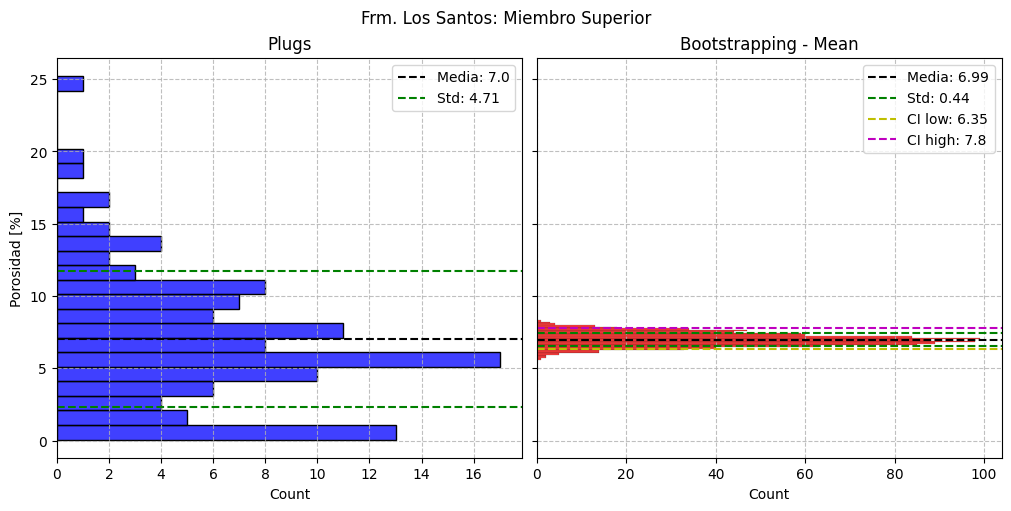

In [9]:
df_K1ls_ms = df_Plugs[filtro_Unidad].copy()

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5), layout='constrained')

sn.histplot(data=df_K1ls_ms, y='Porosidad [%]', bins=25, color='blue', ax=ax[0], legend=False)
sn.histplot(data=df_poroBost, y='Porosidad [%]', bins=25, color='red', ax=ax[1], legend=False)

# Mean
ax[0].axhline(y=df_K1ls_ms['Porosidad [%]'].mean(), c='k', ls='--',
              label='Media: {}'.format(round(df_K1ls_ms['Porosidad [%]'].mean(), 2)))
# Std
ax[0].axhline(y=df_K1ls_ms['Porosidad [%]'].mean() - df_K1ls_ms['Porosidad [%]'].std(), c='g', ls='--',
              label='Std: {}'.format(round(df_K1ls_ms['Porosidad [%]'].std(), 2)))
ax[0].axhline(y=df_K1ls_ms['Porosidad [%]'].mean() + df_K1ls_ms['Porosidad [%]'].std(), c='g', ls='--')
ax[0].legend()

# Mean
ax[1].axhline(y=df_poroBost['Porosidad [%]'].mean(), c='k', ls='--',
              label='Media: {}'.format(round(df_poroBost['Porosidad [%]'].mean(), 2)))
# Std
ax[1].axhline(y=df_poroBost['Porosidad [%]'].mean() - resPoro.standard_error, c='g', ls='--',
              label='Std: {}'.format(round(resPoro.standard_error, 2)))
ax[1].axhline(y=df_poroBost['Porosidad [%]'].mean() + resPoro.standard_error, c='g', ls='--')
# Intervalo de confianza 0.90
ax[1].axhline(y=resPoro.confidence_interval[0], c='y', ls='--',
              label='CI low: {}'.format(round(resPoro.confidence_interval[0], 2)))
ax[1].axhline(y=resPoro.confidence_interval[1], c='m', ls='--',
              label='CI high: {}'.format(round(resPoro.confidence_interval[1], 2)))

ax[1].legend()

ax[0].set_title('Plugs')
ax[1].set_title('Bootstrapping - Mean')

ax[0].grid(ls='--', alpha=0.8)
ax[1].grid(ls='--', alpha=0.8)

plt.suptitle('Frm. Los Santos: Miembro Superior')

plt.show()

Tras el remuestreo, observamos que el promedio de porosidad se mantiene similar al de las muestras originales, alrededor del `7.0%`. Sin embargo, la desviación estándar de las muestras originales es de `4.71`, mientras que para el remuestreo es de `0.44`. Los límites inferior y superior para un intervalo de confianza del 90% son `6.31` y `7.74`, respectivamente.

Estos resultados nos indican que, si bien el promedio de porosidad del miembro superior de la Frm. Los Santos es de aproximadamente `7.0%`, el remuestreo nos proporciona un rango de confianza para este valor estimado. Este rango puede interpretarse considerando los límites del intervalo de confianza o la desviación estándar de la distribución del remuestreo.

El uso de estos límites estimados del intervalo de confianza o la desviación estándar del remuestreo ofrece flexibilidad en la toma de decisiones y permite considerar diferentes escenarios en simulaciones.


# Observaciones
El bootstrapping es una técnica poderosa en el análisis estadístico debido a sus ventajas, pero también presenta algunas consideraciones y desventajas importantes:

**Ventajas:**

1. **No requiere supuestos de distribución:** El bootstrapping es no paramétrico, lo que significa que no requiere asumir una distribución específica para los datos, lo que lo hace útil en una variedad de escenarios.

2. **Útil para muestras pequeñas:** Es especialmente útil cuando se tienen muestras pequeñas, ya que permite estimaciones de parámetros y sus intervalos de confianza sin depender de la distribución de la población.

3. **Robusto frente a datos atípicos:** Al utilizar el remuestreo con reemplazo, el bootstrapping puede ser más robusto frente a datos atípicos o no normales.

4. **Amplia aplicabilidad:** Puede aplicarse a una amplia gama de estadísticas de interés, como la media, la mediana, la varianza, etc.

**Desventajas y Consideraciones:**

1. **Sensible al tamaño de la muestra:** Aunque el bootstrapping puede ser útil para muestras pequeñas, puede ser menos preciso con tamaños de muestra extremadamente pequeños o extremadamente grandes.

2. **Requiere tiempo de cómputo:** El bootstrapping puede ser computacionalmente costoso, especialmente para grandes conjuntos de datos o cuando se realizan muchas iteraciones.

3. **Dependencia de la calidad de los datos:** Si los datos originales no son representativos o están sesgados, el bootstrapping puede producir estimaciones sesgadas o poco fiables.

4. **Intervalos de confianza asimétricos:** En algunos casos, los intervalos de confianza obtenidos mediante bootstrapping pueden ser asimétricos, lo que puede complicar la interpretación de los resultados.


# Fin